In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
#splitting imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#model imports
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
#evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
data.shape

(14204, 12)

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
data=data.dropna()
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

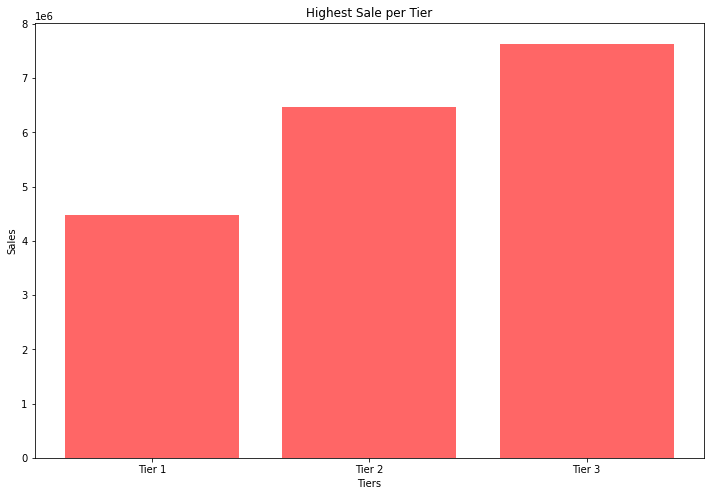

In [9]:
#which location type has the highest number of sales?
sale=data.groupby('Outlet_Location_Type').sum()['Item_Outlet_Sales'] #Y-values
tiers=[tier for tier, data in data.groupby('Outlet_Location_Type')] #X-values

# Plot
f=plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.bar(tiers,sale,color='red',alpha=.6)
plt.xlabel('Tiers')
plt.ylabel('Sales')
plt.title('Highest Sale per Tier')
plt.show()

In [10]:
sale=data.groupby('Outlet_Location_Type').sum()['Item_Outlet_Sales']
print('Tier 3 has the highest number of sale of {}$'.format(max(sale)))

Tier 3 has the highest number of sale of 7636752.632$


In [11]:
sale

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

### TIER 3 HAS THE HIGHEST SALES

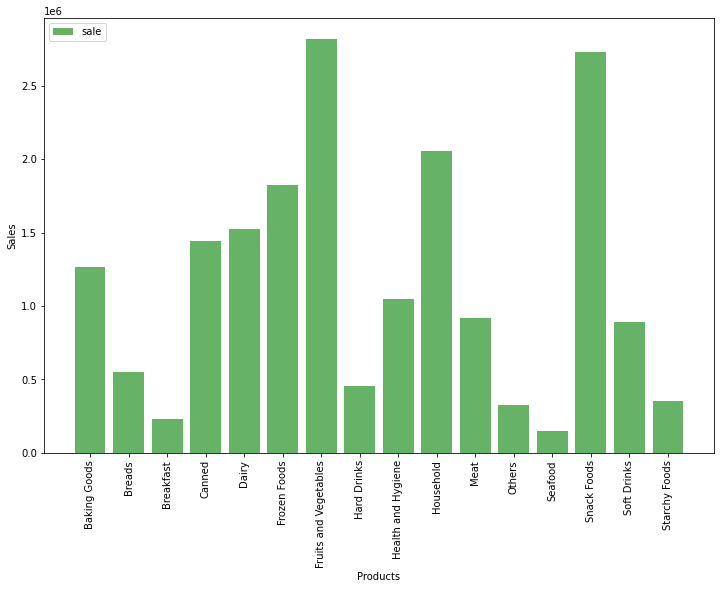

In [12]:
#what type of product is sold the most?
f=plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
sale1=data.groupby('Item_Type').sum()['Item_Outlet_Sales']
products =[product for product, data in data.groupby('Item_Type')]

#Plot the graph

plt.bar(products,sale1,alpha=0.6,color='green')
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

### FRUITS AND VEGETABLES AND SNACK FOODS HAVE THE HIGHEST SALES

Text(0, 0.5, 'Count')

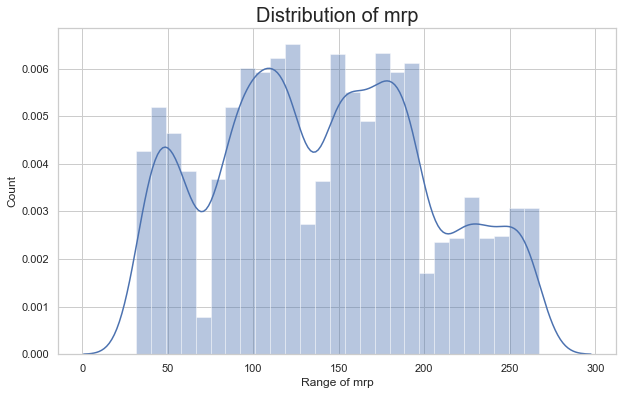

In [53]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Item_MRP'])
plt.title('Distribution of mrp', fontsize = 20)
plt.xlabel('Range of mrp')
plt.ylabel('Count')

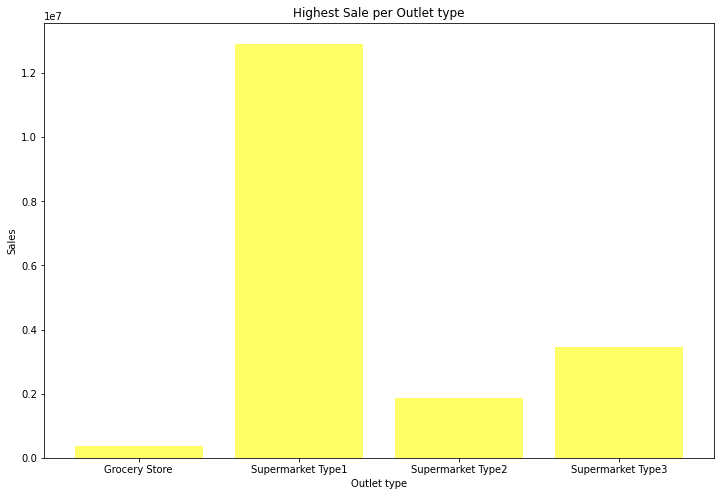

In [13]:
#which location type has the highest number of sales?
sale2=data.groupby('Outlet_Type').sum()['Item_Outlet_Sales'] #Y-values
type1=[type1 for type1, data in data.groupby('Outlet_Type')] #X-values

# Plot
f=plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.bar(type1,sale2,color='yellow',alpha=.6)
plt.xlabel('Outlet type')
plt.ylabel('Sales')
plt.title('Highest Sale per Outlet type')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sb.barplot(data=data,x='Grade',y='Expected price',hue='Trooms',ci=True,palette='cool')
plt.title('Grade vs expected price with respect to trooms')

### SUPER MARKET TYPE 1 HAS THE HIGHEST SALES

In [14]:
# Converting non-numeric labeled column into categorical column

for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = data[i].astype('category')
    else:
        continue
        
# Using Label Encoder technique to convert categorical column into numerical type
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if data[i].dtypes == 'category':
        data[i + '_encode'] = label_encoder.fit_transform(data[i])
        print('\n',i + '_encode has unique values : ',data[i + '_encode'].unique())
    else:
        continue


 Item_Identifier_encode has unique values :  [ 156    8  662 ... 1323 1524 1519]

 Item_Fat_Content_encode has unique values :  [0 1]

 Item_Type_encode has unique values :  [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]

 Outlet_Identifier_encode has unique values :  [9 3 0 1 5 7 2 8 6 4]

 Outlet_Size_encode has unique values :  [1 0 2]

 Outlet_Location_Type_encode has unique values :  [0 2 1]

 Outlet_Type_encode has unique values :  [1 2 0 3]


In [15]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_df = data.select_dtypes(include = numerics)
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

# scaling the data using MinMax Scaling process
data_df_scaled = feature_scale('minmax')
data_df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.100128,0.0,0.266667,1.000000,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,0.005135,1.0,0.933333,0.333333,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.424904,0.0,0.666667,1.000000,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,0.719512,1.0,0.400000,0.000000,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.832478,0.0,0.600000,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.163812,0.777729,0.083333,0.210293,0.237484,0.0,0.866667,0.111111,0.0,1.0,0.333333
8519,0.227746,0.133638,0.326263,0.708333,0.039529,0.575738,1.0,0.000000,0.777778,1.0,0.5,0.333333
8520,0.359929,0.097321,0.228492,0.791667,0.088850,0.870988,0.0,0.533333,0.666667,1.0,0.5,0.333333
8521,0.158083,0.436080,0.304939,1.000000,0.138835,0.437099,1.0,0.866667,0.333333,0.5,1.0,0.666667


In [16]:
corr=data_df_scaled.corr()
corr.style.background_gradient(cmap='PuBuGn')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261,0.048366,-0.027166,0.035973,-0.007568,-0.013371,0.002929,0.000298
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247,-0.029442,0.049815,-0.036094,-0.105722,0.031617,-0.029109,-0.178473
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574,0.012853,0.006063,0.032651,0.003319,0.001215,0.000232,-0.001975
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135,-0.012772,0.003151,0.004970,0.079035,0.428367,-0.089216,-0.122304
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000,0.002869,0.018719,0.017048,0.162325,-0.060517,0.089367,0.401522
Item_Identifier_encode,0.048366,-0.029442,0.012853,-0.012772,0.002869,1.000000,-0.114660,-0.017973,-0.008602,-0.002556,0.003656,-0.001178
Item_Fat_Content_encode,-0.027166,0.049815,0.006063,0.003151,0.018719,-0.114660,1.000000,-0.139434,0.000764,-0.001369,-0.001598,0.002199
Item_Type_encode,0.035973,-0.036094,0.032651,0.004970,0.017048,-0.017973,-0.139434,1.000000,0.001656,-0.000394,0.003084,0.003053
Outlet_Identifier_encode,-0.007568,-0.105722,0.003319,0.079035,0.162325,-0.008602,0.000764,0.001656,1.000000,0.423653,-0.716176,0.099873
Outlet_Size_encode,-0.013371,0.031617,0.001215,0.428367,-0.060517,-0.002556,-0.001369,-0.000394,0.423653,1.000000,-0.590686,-0.260467


In [17]:
abs(corr['Item_Outlet_Sales']).sort_values(ascending=False) #correlation with target column

Item_Outlet_Sales              1.000000
Item_MRP                       0.567574
Outlet_Type_encode             0.401522
Outlet_Identifier_encode       0.162325
Item_Visibility                0.135247
Outlet_Location_Type_encode    0.089367
Outlet_Size_encode             0.060517
Outlet_Establishment_Year      0.049135
Item_Fat_Content_encode        0.018719
Item_Type_encode               0.017048
Item_Weight                    0.013261
Item_Identifier_encode         0.002869
Name: Item_Outlet_Sales, dtype: float64

In [18]:
data_df_scaled.drop(columns=['Item_Identifier_encode','Outlet_Identifier_encode','Item_Weight','Item_Fat_Content_encode','Outlet_Establishment_Year','Outlet_Location_Type_encode'],inplace=True)

## LinearRegression

In [19]:
#seperating dependent and independent column
X=data_df_scaled.drop(columns='Item_Outlet_Sales').to_numpy()
y=data_df_scaled['Item_Outlet_Sales'].to_numpy()

In [20]:
cv = KFold(n_splits=3, shuffle=True, random_state=1) #splitting data

In [21]:
for train, test in cv.split(X,y):
    X_train, X_test=X[train],X[test]
    y_train, y_test=y[train],y[test]

In [22]:
model1=LinearRegression() #building model

In [23]:
reg1=model1.fit(X_train, y_train) #fitting model

In [24]:
y1_pred=reg1.predict(X_test) #predicting values
y1_pred 

array([0.28400858, 0.15574642, 0.11274896, ..., 0.06077979, 0.11002046,
       0.22623857])

In [25]:
scoring=['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','neg_median_absolute_error']
scores1 = cross_validate(model1, X, y, scoring=scoring, cv=cv) #model evaluation

In [26]:
m1s1=(scores1['test_r2'])
m1s2=(scores1['test_neg_mean_squared_error'])
m1s3=(scores1['test_neg_root_mean_squared_error'])
m1s4=(scores1['test_neg_mean_absolute_percentage_error'])
m1s5=(scores1['test_neg_median_absolute_error'])

In [27]:
print(f'''r2:{mean(m1s1)}
MSE:{mean(m1s2)}
RMSE:{mean(m1s3)}
MAPE:{mean(m1s4)}
MAE:{mean(m1s5)}''')

r2:0.48934923758205445
MSE:-0.00872599188332558
RMSE:-0.09340909327133484
MAPE:-50746812257.34814
MAE:-0.054165239525419705


# **Random Forest Regressor**

In [28]:
model2 = RandomForestRegressor() #building model

In [29]:
reg2=model2.fit(X_train, y_train) #fitting model

In [30]:
y2_pred=reg2.predict(X_test) #predicting values
y2_pred 

array([0.32492451, 0.1529542 , 0.13523003, ..., 0.04841018, 0.07932419,
       0.22264103])

In [31]:
scores2 = cross_validate(model2, X, y, scoring=scoring, cv=cv) #model evaluation

In [32]:
m2s1=(scores2['test_r2'])
m2s2=(scores2['test_neg_mean_squared_error'])
m2s3=(scores2['test_neg_root_mean_squared_error'])
m2s4=(scores2['test_neg_mean_absolute_percentage_error'])
m2s5=(scores2['test_neg_median_absolute_error'])

In [33]:
print(f'''r2:{mean(m2s1)}
MSE:{mean(m2s2)}
RMSE:{mean(m2s3)}
MAPE:{mean(m2s4)}
MAE:{mean(m2s5)}''')

r2:0.5478168966841565
MSE:-0.007724998180006559
RMSE:-0.08788903774815289
MAPE:-6903552756.300538
MAE:-0.040657961848413686


# **Ada Boost Regressor**

In [34]:
model3 = AdaBoostRegressor() #building mmodel

In [35]:
reg3=model3.fit(X_train, y_train) #fitting model

In [36]:
y3_pred=reg3.predict(X_test) #predicting values
y3_pred 

array([0.36347345, 0.15880572, 0.14020939, ..., 0.14020939, 0.14020939,
       0.30676888])

In [37]:
scores3 = cross_validate(model3, X, y, scoring=scoring, cv=cv) #model evaluation

In [38]:
m3s1=(scores3['test_r2'])
m3s2=(scores3['test_neg_mean_squared_error'])
m3s3=(scores3['test_neg_root_mean_squared_error'])
m3s4=(scores3['test_neg_mean_absolute_percentage_error'])
m3s5=(scores3['test_neg_median_absolute_error'])

In [39]:
print(f'''r2:{mean(m3s1)}
MSE:{mean(m3s2)}
RMSE:{mean(m3s3)}
MAPE:{mean(m3s4)}
MAE:{mean(m3s5)}''')

r2:0.440200513302938
MSE:-0.009567753961298739
RMSE:-0.0976314103237343
MAPE:-62769734335.83569
MAE:-0.06492269558189331


# **Stacking**

In [40]:
estimator=[('lr',LinearRegression()),('knn',KNeighborsRegressor()),('tree',DecisionTreeRegressor()),('svm',SVR())]
final_estimators=LinearRegression()
model4 = StackingRegressor(estimators=estimator, final_estimator=final_estimators, cv=3) #building model

In [41]:
reg4=model4.fit(X_train, y_train) #fitting model


In [42]:
y4_pred=reg4.predict(X_test) #predicting values
y4_pred 

array([0.29931068, 0.1675744 , 0.11431093, ..., 0.06646205, 0.07155644,
       0.25646427])

In [43]:
scores4 = cross_validate(model4, X, y, scoring=scoring, cv=cv) #model evaluation

In [44]:
m4s1=(scores4['test_r2'])
m4s2=(scores4['test_neg_mean_squared_error'])
m4s3=(scores4['test_neg_root_mean_squared_error'])
m4s4=(scores4['test_neg_mean_absolute_percentage_error'])
m4s5=(scores4['test_neg_median_absolute_error'])

In [45]:
print(f'''r2:{mean(m4s1)}
MSE:{mean(m4s2)}
RMSE:{mean(m4s3)}
MAPE:{mean(m4s4)}
MAE:{mean(m4s5)}''')

r2:0.586633203313634
MSE:-0.007063016559856107
RMSE:-0.08403952943504062
MAPE:-18953924936.908573
MAE:-0.041313965216383565


# **Model Comparison**

In [46]:
#tabulation
comp=pd.DataFrame()
comp['Model']=['Linear Regression','Random Forest Regressor','ADA Boost Regressor','Stacking']
comp['R2']=[mean(m1s1),mean(m2s1),mean(m3s1),mean(m4s1)]
comp['MSE']=[mean(m1s2),mean(m2s2),mean(m3s2),mean(m4s2)]
comp['RMSE']=[mean(m1s3),mean(m2s3),mean(m3s3),mean(m4s3)]
comp['MAPE']=[mean(m1s4),mean(m2s4),mean(m3s4),mean(m4s4)]
comp['MAE']=[mean(m1s5),mean(m2s5),mean(m3s5),mean(m4s5)]
comp

,Model,R2,MSE,RMSE,MAPE,MAE
0,Linear Regression,0.489349,-0.008726,-0.093409,-5.074681e+10,-0.054165
1,Random Forest Regressor,0.547817,-0.007725,-0.087889,-6.903553e+09,-0.040658
2,ADA Boost Regressor,0.440201,-0.009568,-0.097631,-6.276973e+10,-0.064923
3,Stacking,0.586633,-0.007063,-0.084040,-1.895392e+10,-0.041314


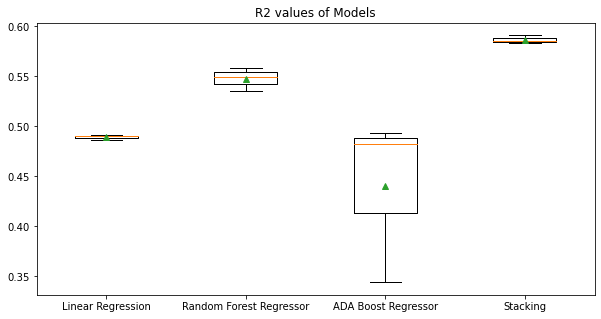

In [47]:
#visualizatiom
names=['Linear Regression','Random Forest Regressor','ADA Boost Regressor','Stacking']
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('R2 values of Models')
plt.boxplot([m1s1,m2s1,m3s1,m4s1], labels=names, showmeans=True);

## Insights:R2 value of Stacking is high when compared to others.

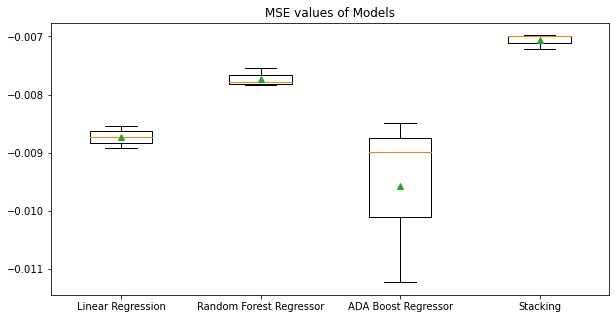

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MSE values of Models')
plt.boxplot([m1s2,m2s2,m3s2,m4s2], labels=names, showmeans=True);

# Insights: MSE of Stacking is high when compared to others.

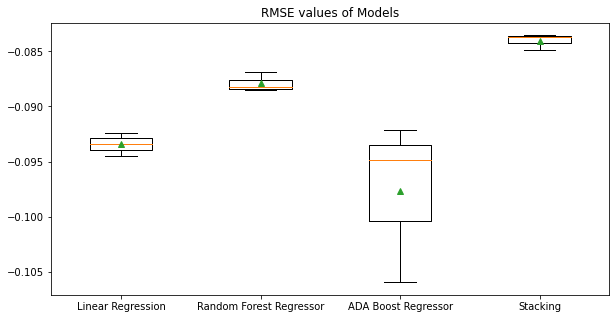

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('RMSE values of Models')
plt.boxplot([m1s3,m2s3,m3s3,m4s3], labels=names, showmeans=True);

# Insights:RMSE value of stacking is high when compared to others.

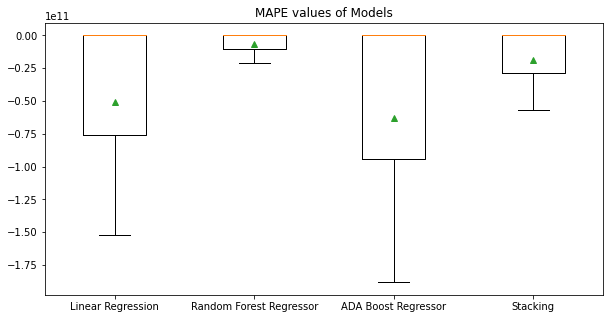

In [50]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MAPE values of Models')
plt.boxplot([m1s4,m2s4,m3s4,m4s4], labels=names, showmeans=True);

# Insights:MAPE of Stacking is high when compared to others.

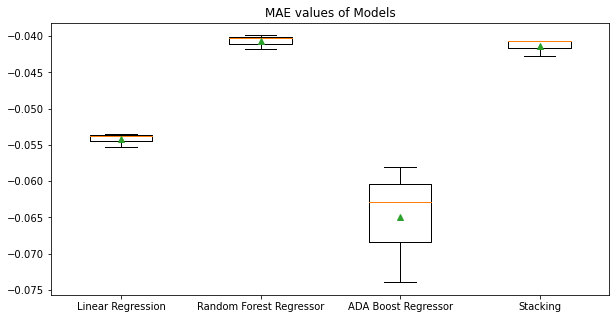

In [51]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MAE values of Models')
plt.boxplot([m1s5,m2s5,m3s5,m4s5], labels=names, showmeans=True);

# MAE value of Stacking is high when compared to others.

**FINAL CONCLUSION**

# Thereby we can conclude that Stacking has performed well in this data.

**Scatter Plot of Actual and Predicted values of Stacking**

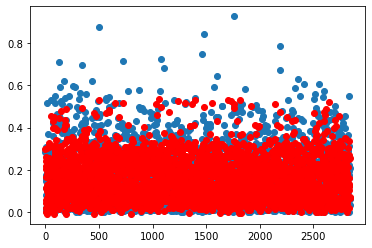

In [52]:
x=list(np.arange(0,len(y_test)))
plt.scatter(x,y_test)
plt.scatter(x,y4_pred,color='red');

# From this chart we can see most of predicted and actual values overlap therefore performance of the model is good.